# <span style="color:#0b486b"> Deep Learning</span>

## <span style="color:#0b486b">Convolutional Neural Networks and Image Classification</span>

**This part of questionary is designed to access your knowledge and coding skill with Tensorflow as well as hands-on experience with training Convolutional Neural Network (CNN).**
**The dataset we use for this part is a small animal dataset consisting of $5,000$ images of cats, dogs, fishes, lions, chickens, elephants, butterflies, cows, spiders, and horses, each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1bEwEx72lLrjY_Idj_FgV22atIdjtCV66/view?usp=sharing) and then decompress to the folder the folder `datasets\Animals` for you in the assignment folder.**

**Your task is to build a CNN model using *TF 2.x* to classify these animals.**

1. `AnimalsDatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also help generate next batches for training. `AnimalsDatasetManager` will be passed to CNN model for training and testing.
2. `Layers`: A class providing some static method to create basic CNN layers.
3. `DefaultModel`: A base class for the CNN model.
4. `YourModel`: The class you'll need to implement to build the CNN model. It inherits some useful attributes and functions from the base class `DefaultModel`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
# !pip install opencv-python
# !pip install imutils
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel

In [3]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [4]:
# Create table of label and data
label_folder_dict = create_label_folder_dict("./datasets/Animals")

In [5]:
# Sizing (Crop) the picture
sp = SimplePreprocessor(width=32, height=32)
# Initializer
data_manager = AnimalsDatasetManager([sp])
# Use 100 as per processing 
data_manager.load(label_folder_dict, verbose=100)
# Encoding
data_manager.process_data_label()
# Data spliting
data_manager.train_valid_test_split()

butterfiles 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cats 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
chickens 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cows 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
dogs 501
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
elephants 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
horses 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
spiders 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Proc

<span style="color:red">**Question 1**</span> **After running the above cells to train the default model and observe the learning curve. Report your observation (i.e. did the model learn well? if not, what is the problem? what would you do to improve it?). Write your answer below.**

### Ans
We can find the result of in two dimention:

From the test accuracy is under 20%, and the train loss is higher than expected. 

The validation accuracy is also fluctuated. From the lecture and tutorial we may assume the model is too simple to characterise a training set. But if we look closer, we can find the `learning rate` is quit large.

From the learning rate 0.5 we can observe that it could overshoot the minima.
To improve the model we can first decrese the learning rate ratio. 

We can also see if we lowered the learning rate, the validation accuracy did increase and improve the model performance. With the lower rate, the optimization may able to come closer to mimima point instead of skipping.

Epoch 1/20
63/63 [==============================] - 19s 287ms/step - loss: 2.2929 - accuracy: 0.1310 - val_loss: 2.3050 - val_accuracy: 0.0800
Epoch 2/20
63/63 [==============================] - 17s 270ms/step - loss: 2.3008 - accuracy: 0.1128 - val_loss: 2.2733 - val_accuracy: 0.1400
Epoch 3/20
63/63 [==============================] - 17s 264ms/step - loss: 2.2928 - accuracy: 0.1430 - val_loss: 2.3091 - val_accuracy: 0.0900
Epoch 4/20
63/63 [==============================] - 16s 261ms/step - loss: 2.3059 - accuracy: 0.0927 - val_loss: 2.3036 - val_accuracy: 0.1100
Epoch 5/20
63/63 [==============================] - 17s 267ms/step - loss: 2.3054 - accuracy: 0.1013 - val_loss: 2.3075 - val_accuracy: 0.0800
Epoch 6/20
63/63 [==============================] - 16s 259ms/step - loss: 2.3048 - accuracy: 0.0993 - val_loss: 2.3059 - val_accuracy: 0.1140
Epoch 7/20
63/63 [==============================] - 16s 251ms/step - loss: 2.3050 - accuracy: 0.0975 - val_loss: 2.3024 - val_accuracy: 0.1040

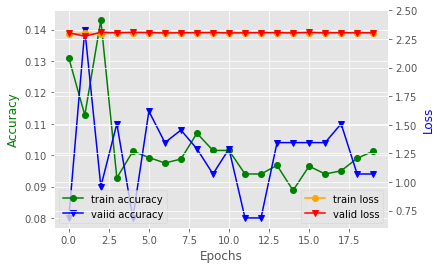

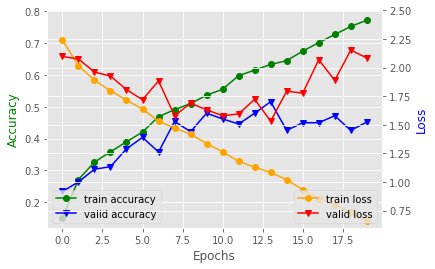

In [469]:
########### With the higher learning rate ##########
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.5,
                       verbose= False
                       )
network1.build_cnn()
network1.fit(data_manager, batch_size = 64, num_epochs = 20)
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)
########### With the lower learning rate ###########
network2 = DefaultModel(name='network2',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.1,
                       verbose= False)
network2.build_cnn()
network2.fit(data_manager, batch_size = 64, num_epochs = 20)
network2.compute_accuracy(data_manager.X_test, data_manager.y_test)

network1.plot_progress()
network2.plot_progress()

**For question 2 to 6, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures as well as parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`, which you can find in function `__init__()` for the class `DefaultModel`:**
1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 

In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import layers, models
from keras.activations import *
from keras.preprocessing.image import ImageDataGenerator

<span style="color:red">**Question 2**</span> **Write the code of the `YourModel` class here. Note that this class will inherit from the `DefaultModel` class. You'll only need to re-write the code for the `build_cnn` method for the `YourModel` class from the cell below which is inherited from the `DefaultModel` class.**

In [245]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1', width=32, height=32, depth=3,
                 num_blocks=2, feature_maps=32, num_classes=4, drop_rate=0.0,
                 batch_norm = None, is_augmentation = False, activation_func='relu',
                 optimizer='adam', batch_size=10, num_epochs= 20, learning_rate=0.0001,
                 verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, 
                                        feature_maps, num_classes, drop_rate, 
                                        batch_norm, is_augmentation, activation_func, 
                                        optimizer, batch_size, num_epochs, learning_rate, 
                                        verbose)
    
    def build_cnn(self):
        #Insert your code here
        self.model = models.Sequential()
        for i in range(self.num_blocks):
            # Conv Layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), 
                                         padding = 'same', input_shape=(32,32,3)))
            # Batch Norm
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            # Activation Function
            self.model.add(layers.Activation(self.activation_func))
            # Conv Layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding = 'same'))
            # Batch Norm
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            # Activation Function
            self.model.add(layers.Activation(self.activation_func))
            # Mean Pool
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
            # Drop out layer
            self.model.add(layers.Dropout(self.drop_rate))
    
        # Flattening
        self.model.add(layers.Flatten())
        # Output
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))

<span style="color:red">**Question 3**</span> **Once writing your own models, you should be able to use it to experiment with dropout or batch normalization. In this question, you'll use your model to finetune the dropout rate. Report the `drop_rate` rates you tried along with the validation accuracy for each rate (recomended range: 0.2 to 0.5) and show the losses during training. What is the final `drop_rate` rate that you'll use? Did dropout improve performance? Did it help reduce overfitting? Note that in this experiment, you should set `batch_norm` to `None`, meaning that we do not use the batch normalization.**

### Ans
The purpose of the dropout is to avoid the overfitting. In the diagram we can observe when the dropout rate increases the potential overfitting in the diagram decrease. But after the optimal point (here we can see when dropout rate = 0.2 or 0.3). 

The larger drop rate of the nodes may cause model may not learn properly and decrease its performance. Also, with higher dropout rate which causes lesser validation loss and come closer to the train loss. Which indicates the ratio of the network might be overfitting.

Epoch 1/20
63/63 [==============================] - 23s 365ms/step - loss: 2.1983 - accuracy: 0.1825 - val_loss: 2.1159 - val_accuracy: 0.2320
Epoch 2/20
63/63 [==============================] - 22s 354ms/step - loss: 1.9844 - accuracy: 0.2675 - val_loss: 1.9468 - val_accuracy: 0.2840
Epoch 3/20
63/63 [==============================] - 24s 376ms/step - loss: 1.8565 - accuracy: 0.3235 - val_loss: 1.8797 - val_accuracy: 0.3400
Epoch 4/20
63/63 [==============================] - 25s 396ms/step - loss: 1.6992 - accuracy: 0.3672 - val_loss: 1.8091 - val_accuracy: 0.3260
Epoch 5/20
63/63 [==============================] - 23s 373ms/step - loss: 1.6379 - accuracy: 0.3842 - val_loss: 1.7843 - val_accuracy: 0.3400
Epoch 6/20
63/63 [==============================] - 26s 407ms/step - loss: 1.5414 - accuracy: 0.4265 - val_loss: 1.5993 - val_accuracy: 0.4220
Epoch 7/20
63/63 [==============================] - 26s 409ms/step - loss: 1.4595 - accuracy: 0.4543 - val_loss: 1.6140 - val_accuracy: 0.4660

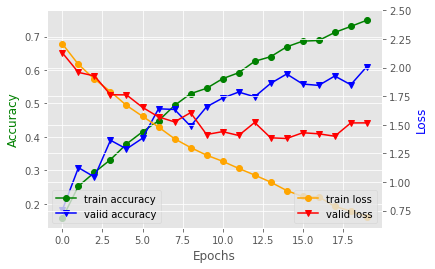


-------------------------- Drop rate 0.3 --------------------------
Epoch 1/20
63/63 [==============================] - 26s 404ms/step - loss: 2.2862 - accuracy: 0.1227 - val_loss: 2.2693 - val_accuracy: 0.1620
Epoch 2/20
63/63 [==============================] - 25s 398ms/step - loss: 2.1155 - accuracy: 0.2148 - val_loss: 2.0382 - val_accuracy: 0.2620
Epoch 3/20
63/63 [==============================] - 26s 407ms/step - loss: 2.0356 - accuracy: 0.2528 - val_loss: 1.9903 - val_accuracy: 0.2500
Epoch 4/20
63/63 [==============================] - 26s 419ms/step - loss: 1.9028 - accuracy: 0.2943 - val_loss: 1.9161 - val_accuracy: 0.2860
Epoch 5/20
63/63 [==============================] - 32s 503ms/step - loss: 1.8140 - accuracy: 0.3290 - val_loss: 1.8206 - val_accuracy: 0.3080
Epoch 6/20
63/63 [==============================] - 26s 406ms/step - loss: 1.7016 - accuracy: 0.3655 - val_loss: 1.7641 - val_accuracy: 0.3480
Epoch 7/20
63/63 [==============================] - 27s 426ms/step - loss

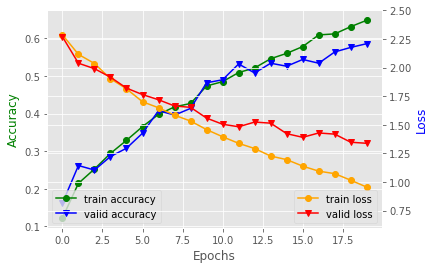


-------------------------- Drop rate 0.4 --------------------------
Epoch 1/20
63/63 [==============================] - 29s 436ms/step - loss: 2.2930 - accuracy: 0.1260 - val_loss: 2.2315 - val_accuracy: 0.1820
Epoch 2/20
63/63 [==============================] - 27s 423ms/step - loss: 2.1462 - accuracy: 0.2093 - val_loss: 2.0485 - val_accuracy: 0.2360
Epoch 3/20
63/63 [==============================] - 26s 414ms/step - loss: 1.9743 - accuracy: 0.2715 - val_loss: 1.9685 - val_accuracy: 0.2740
Epoch 4/20
63/63 [==============================] - 26s 413ms/step - loss: 1.8853 - accuracy: 0.3052 - val_loss: 1.8693 - val_accuracy: 0.3120
Epoch 5/20
63/63 [==============================] - 26s 412ms/step - loss: 1.7852 - accuracy: 0.3363 - val_loss: 1.8359 - val_accuracy: 0.3420
Epoch 6/20
63/63 [==============================] - 26s 420ms/step - loss: 1.7068 - accuracy: 0.3652 - val_loss: 1.9341 - val_accuracy: 0.2980
Epoch 7/20
63/63 [==============================] - 26s 418ms/step - loss

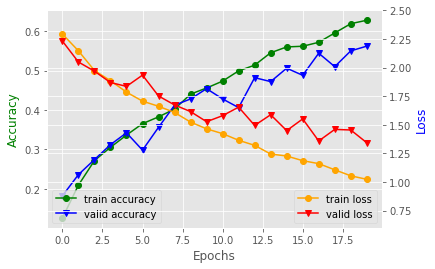


-------------------------- Drop rate 0.5 --------------------------
Epoch 1/20
63/63 [==============================] - 27s 415ms/step - loss: 2.2881 - accuracy: 0.1205 - val_loss: 2.2919 - val_accuracy: 0.1320
Epoch 2/20
63/63 [==============================] - 26s 417ms/step - loss: 2.2093 - accuracy: 0.1737 - val_loss: 2.1264 - val_accuracy: 0.2200
Epoch 3/20
63/63 [==============================] - 26s 417ms/step - loss: 2.0643 - accuracy: 0.2470 - val_loss: 2.0088 - val_accuracy: 0.2660
Epoch 4/20
63/63 [==============================] - 27s 432ms/step - loss: 1.9233 - accuracy: 0.3070 - val_loss: 1.9266 - val_accuracy: 0.3080
Epoch 5/20
63/63 [==============================] - 28s 444ms/step - loss: 1.8488 - accuracy: 0.3245 - val_loss: 1.9908 - val_accuracy: 0.2800
Epoch 6/20
63/63 [==============================] - 26s 419ms/step - loss: 1.8074 - accuracy: 0.3365 - val_loss: 1.8193 - val_accuracy: 0.3180
Epoch 7/20
63/63 [==============================] - 26s 414ms/step - loss

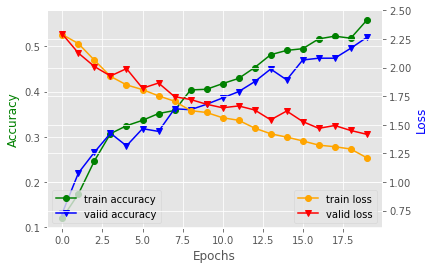

Wall time: 43min 32s


In [248]:
%%time
################################# OG model #########################################
oringial_network = YourModel(name='network3', 
                             feature_maps=32,
                             num_classes=len(data_manager.classes),
                             batch_size=32,
                             num_blocks=4,
                             batch_norm=None, 
                             optimizer='adam', 
                             learning_rate= 0.001,
                             verbose= False)
oringial_network.build_cnn()
oringial_network.fit(data_manager, batch_size = 64, num_epochs = 20)
######################################################################################
drop_rate = [0.2, 0.3, 0.4, 0.5]
# Model Placeholder
test_acc_lst = []
for rate in drop_rate:
    print(f'\n-------------------------- Drop rate {rate} --------------------------')
    drop_rate_network = YourModel(name='network4', 
                                  feature_maps=32,
                                  num_classes=len(data_manager.classes), 
                                  batch_size=32,
                                  num_blocks=4,
                                  drop_rate= rate, # enter your final dropout rate value here
                                  batch_norm=None, 
                                  optimizer='adam', 
                                  learning_rate= 0.001,
                                  verbose= False)
    drop_rate_network.build_cnn()
    drop_rate_network.fit(data_manager, batch_size = 64, num_epochs = 20)
    test_acc_lst.append(drop_rate_network.compute_accuracy(data_manager.X_test, data_manager.y_test))
    drop_rate_network.plot_progress()

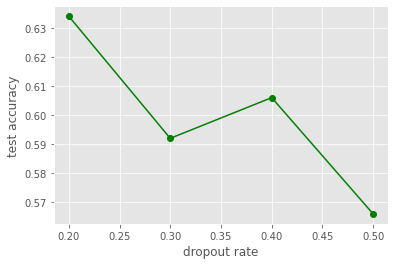

In [259]:
plt.plot(drop_rate, test_acc_lst, color='green', marker="o")
plt.xlabel('dropout rate')
plt.ylabel('test accuracy')
plt.show()

<span style="color:red">**Question 4**</span> **Now, let's try using batch normalization. What is the validation and test result? Does it improve the model? How does it compare to the model using dropout? To have a fair comparison, in this experiment, we set `drop_rate=0` to not use the dropout. You should show the training progress of losses and accuracies and comment about those plots. You can further comment about the efficiency of dropout and batch norm for your training.**

### Ans.
Compare to drop out method, batch normalization provides the model more overfitting in training. 
While using Normalization can speed up convergence for the model. 

Also, the BN method is calculated on every mini-batch not on whole dataset. 
Thus, the noises between $\mu$, and $\sigma$ may occur. Which is quite similar to the dropout, so the batch normalization like dropout has the regularization effect.

In approaximatly in epoch 9 to 10, we can find the valid accuracy was staggered, and the loss is fluctuated, which also identified the overfitting situation that occured in the model.

Epoch 1/20
63/63 [==============================] - 34s 523ms/step - loss: 1.9805 - accuracy: 0.3270 - val_loss: 2.4662 - val_accuracy: 0.1140
Epoch 2/20
63/63 [==============================] - 31s 497ms/step - loss: 1.5215 - accuracy: 0.4615 - val_loss: 3.1971 - val_accuracy: 0.1140
Epoch 3/20
63/63 [==============================] - 30s 483ms/step - loss: 1.3045 - accuracy: 0.5422 - val_loss: 2.7815 - val_accuracy: 0.1360
Epoch 4/20
63/63 [==============================] - 31s 485ms/step - loss: 1.1463 - accuracy: 0.5980 - val_loss: 2.5613 - val_accuracy: 0.2460
Epoch 5/20
63/63 [==============================] - 31s 500ms/step - loss: 0.9965 - accuracy: 0.6480 - val_loss: 1.8831 - val_accuracy: 0.4080
Epoch 6/20
63/63 [==============================] - 30s 484ms/step - loss: 0.8533 - accuracy: 0.6982 - val_loss: 1.6894 - val_accuracy: 0.4380
Epoch 7/20
63/63 [==============================] - 31s 497ms/step - loss: 0.7516 - accuracy: 0.7370 - val_loss: 1.4371 - val_accuracy: 0.5340

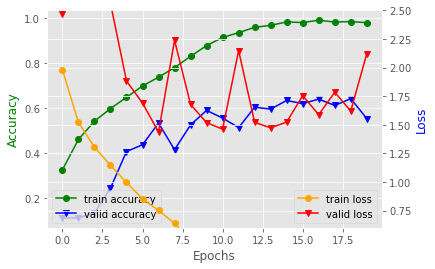

In [233]:
batch_norm_network = YourModel(name='network4', 
                               feature_maps=32,
                               num_classes=len(data_manager.classes), 
                               num_blocks=4,
                               drop_rate= 0, 
                               batch_norm=True, #do batch norm
                               optimizer='adam', 
                               learning_rate= 0.001,
                               verbose= False)
batch_norm_network.build_cnn()
batch_norm_network.fit(data_manager, batch_size = 64, num_epochs = 20)
batch_norm_network.compute_accuracy(data_manager.X_test, data_manager.y_test)
batch_norm_network.plot_progress()

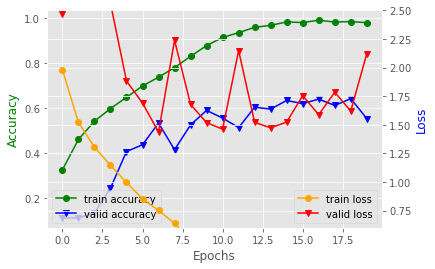

In [240]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(batch_norm_network.history.history['accuracy'], label='train accuracy', color='green', marker="o")
ax1.plot(batch_norm_network.history.history['val_accuracy'], label='valid accuracy', color='blue', marker = "v")
ax2.plot(batch_norm_network.history.history['loss'], label = 'train loss', color='orange', marker="o")
ax2.plot(batch_norm_network.history.history['val_loss'], label = 'valid loss', color='red', marker = "v")
ax1.legend(loc=3)

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='g')
ax2.set_ylabel('Loss', color='b')
ax2.legend(loc=4)
plt.ylim([0.6, 2.5])
plt.show()

<span style="color:red">**Question 5**</span> **We now try to apply data augmentation to improve the performance. Extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation. Also we need to incorporate early stopping to your training process. Specifically, we can early stop the training if the valid accuracy cannot increase in three consecutive epochs.**

In [264]:
#Insert your code here. You can add more cells if necessary
from keras.callbacks import EarlyStopping
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',width=32, height=32, depth=3,num_blocks=2,
                 feature_maps=32,num_classes=4,drop_rate=0.2,batch_norm = None,
                 is_augmentation = False,activation_func='relu',optimizer='adam',
                 batch_size=10,num_epochs= 20,learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, 
                                        depth, num_blocks, feature_maps, 
                                        num_classes, drop_rate, batch_norm, 
                                        is_augmentation, activation_func, optimizer, 
                                        batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        #reuse code of previous section here
        self.model = models.Sequential()
        for i in range(self.num_blocks):
            # Conv Layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding = 'same', input_shape=(32,32,3)))
            # Batch Norm
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            # Activation Function
            self.model.add(layers.Activation(self.activation_func))
            # Conv Layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding = 'same'))
            # Batch Norm
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            # Activation Function
            self.model.add(layers.Activation(self.activation_func))
            # Mean Pool
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
            # Drop out layer
            self.model.add(layers.Dropout(self.drop_rate))
    
        # Flattening
        self.model.add(layers.Flatten())
        # Output
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))

    def fit(self, data_manager, batch_size=None, num_epochs=None):
        #############################################################
        earlyStopping = EarlyStopping(monitor='val_accuracy', patience=3, mode = 'max')
        #############################################################
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        #############################################################
        if self.is_augmentation is not None:
            datagen = ImageDataGenerator(horizontal_flip = True,
                                         width_shift_range = 0.1, 
                                         height_shift_range = 0.1,
                                         rotation_range = 5, 
                                         shear_range = 0.1,
                                         zoom_range = 0.1,
                                         fill_mode = "nearest")
            it = datagen.flow(data_manager.X_train,data_manager.y_train,
                              shuffle = False,batch_size = batch_size)
            self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            self.history = self.model.fit(it, epochs = num_epochs, 
                                          steps_per_epoch = len(data_manager.X_train)//batch_size,
                                          validation_steps = len(data_manager.X_valid)//batch_size,
                                          validation_data = (data_manager.X_valid, data_manager.y_valid),
                                          batch_size = batch_size,
                                          callbacks=[earlyStopping],
                                          verbose= self.verbose)
        #############################################################
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        self.history = self.model.fit(x = data_manager.X_train, y = data_manager.y_train, 
                                      validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = num_epochs, batch_size = batch_size, 
                                      callbacks=[earlyStopping],verbose= self.verbose)

<span style="color:red">**Question 6**</span> **Leverage the data augmentation with dropout and batch norm, and try to observe if you can really boost the performance.**

### Ans.

Based on the assumption of the data augmentation we were looking forward to receiving the improvement of the model due to `extension of the data`. 
On the other hand, we can say the model did have a majority improvement compared to the primary model in 3.2.

However, the previous model with dropout rate tuning, `test_accuracy` is lower. But we can observe the model has less overfitting condition. In the `train_loss` we may also observe that it provides a validate dreasement.

In the article from the stackoverflow I found, the result of augmentation may not be easy to determine but the case like character recognition could be a very helpful method. But in most of the cases if we don’t hold enough data for model training, we could use the augmentation to avoid overfitting problem.


Epoch 1/20
63/63 [==============================] - 36s 552ms/step - loss: 2.2897 - accuracy: 0.2262 - val_loss: 3.0162 - val_accuracy: 0.1020
Epoch 2/20
63/63 [==============================] - 34s 538ms/step - loss: 2.0168 - accuracy: 0.3268 - val_loss: 2.7346 - val_accuracy: 0.1300
Epoch 3/20
63/63 [==============================] - 33s 530ms/step - loss: 1.8959 - accuracy: 0.3853 - val_loss: 2.5919 - val_accuracy: 0.1660
Epoch 4/20
63/63 [==============================] - 34s 540ms/step - loss: 1.7737 - accuracy: 0.4330 - val_loss: 2.6019 - val_accuracy: 0.1700
Epoch 5/20
63/63 [==============================] - 37s 593ms/step - loss: 1.7280 - accuracy: 0.4560 - val_loss: 2.1002 - val_accuracy: 0.3300
Epoch 6/20
63/63 [==============================] - 35s 552ms/step - loss: 1.6293 - accuracy: 0.4905 - val_loss: 2.2189 - val_accuracy: 0.3300
Epoch 7/20
63/63 [==============================] - 37s 587ms/step - loss: 1.5773 - accuracy: 0.5145 - val_loss: 2.0324 - val_accuracy: 0.4100

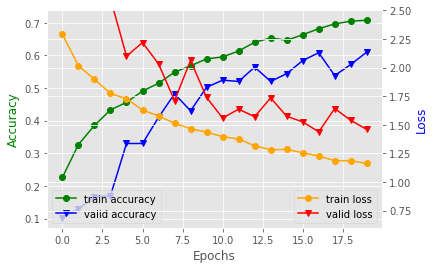

In [473]:
#Insert your code here. You can add more cells if necessary
data_augmentation_network = YourModel(name='network5',
                                      feature_maps=32,
                                      num_classes=len(data_manager.classes),
                                      num_blocks=4,
                                      drop_rate= 0.5,
                                      batch_norm=True, #do batch norm 
                                      is_augmentation=True,
                                      optimizer='adam',
                                      learning_rate= 0.001
                                     )
data_augmentation_network.build_cnn()
data_augmentation_network.fit(data_manager, batch_size = 64, num_epochs = 20)
data_augmentation_network.compute_accuracy(data_manager.X_test, data_manager.y_test)
data_augmentation_network.plot_progress()

<span style="color:red">**Question 7**</span> **Exploring Label Smoothing Technique for Improving Generalization Ability.**


Label smoothing is a super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate label smoothing technique to the above deep learning model and experiment its performance. There are some papers and documents for label smoothing reference as follows:
- Main paper from Goeff Hinton [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) and a good article [article link](https://towardsdatascience.com/what-is-label-smoothing-108debd7ef06).

You need to extend your model developed above with label smoothing technique, train a model with that code, and write your observations and comments about the result.

### Ans
The method of label smoothing is by adding an additional $y$ to alterate the `softmax` level gradient descent which will try to make $p$ as close to $pred_y$ as possible. But before hand `One-hot encoded` labels encourages largest possible logit gaps to be fed into the softmax function. Intuitively, large logit gaps combined with the bounded gradient will make the model less adaptive and too confident about its predictions.

The final result shows the power did increase the test accuracy and improve the final result. Intuitively, large logit gaps combined with the bounded gradient will make the model less adaptive and too confident about its predictions.

In [70]:
# Insert your code here. You can add more cells if necessary
##########################  label smoothing  ##################################
from tensorflow.keras.losses import categorical_crossentropy
class smoothing(tf.keras.losses.Loss):
    def __init__(self, label_smoothing=0.1, num_classes= len(data_manager.classes), from_logits = None):
        self.from_logits = from_logits
        super(smoothing, self).__init__()
        self.label_smoothing = label_smoothing
        self.num_classes = num_classes
        
    def call(self, y_true, y_pred):
        y_true_1_hot = tf.one_hot(tf.transpose(tf.cast(y_true, tf.int32), perm= [1,0])[0], 
                                  depth= self.num_classes, axis=-1)
        loss = categorical_crossentropy(y_true_1_hot, y_pred, label_smoothing = self.label_smoothing
                                        , from_logits = self.from_logits)
        # tf.print(loss)
        return loss
##############################################################################
class YourModel(DefaultModel):
    def __init__(self,
                 name='network7',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = None,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 from_logits = None):
        self.from_logits = from_logits
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, 
                                        num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, 
                                        learning_rate)
    
    def build_cnn(self):
        #reuse code of previous section here
        self.model = models.Sequential()
        for i in range(self.num_blocks):
            # Conv Layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding = 'same', input_shape=(32,32,3)))
            # Batch Norm
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            # Activation Function
            self.model.add(layers.Activation(self.activation_func))
            # Conv Layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding = 'same'))
            # Batch Norm
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            # Activation Function
            self.model.add(layers.Activation(self.activation_func))
            # Mean Pool
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
    
        # Flattening
        self.model.add(layers.Flatten())
        
        # Output
        if self.from_logits is not None:
            # Turn off the activation function
            self.model.add(layers.Dense(self.num_classes, activation= None))
        else:
            # Keep output layer as softmax
            self.model.add(layers.Dense(self.num_classes, activation= 'softmax'))
    
    def fit(self, data_manager, batch_size=None, num_epochs=None, from_logits = None):
        earlyStopping = EarlyStopping(monitor='val_accuracy', patience=3, mode = 'max')
        from_logits = self.from_logits if from_logits is None else from_logits
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        ############################################################################
        self.model.compile(optimizer=self.optimizer, 
                           loss=smoothing(from_logits), 
                           metrics=['accuracy'])
        ############################################################################
        self.history = self.model.fit(x = data_manager.X_train, 
                                      y = data_manager.y_train, 
                                      validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = num_epochs, 
                                      batch_size = batch_size, 
                                      callbacks=[earlyStopping],
                                      verbose= self.verbose)

label_smoothing_network = YourModel(name='network7',
                                    feature_maps=32,
                                    num_classes=len(data_manager.classes),
                                    num_blocks=4,
                                    drop_rate= 0.3,
                                    batch_norm=True,
                                    optimizer='adam',
                                    learning_rate= 0.001)
label_smoothing_network.build_cnn()
label_smoothing_network.fit(data_manager, batch_size = 64, num_epochs = 20)

Epoch 1/20


ValueError: in user code:

    File "C:\Anaconda\envs\Python Project\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "<ipython-input-17-1861cbe149fd>", line 14, in call  *
        loss = categorical_crossentropy(y_true_1_hot, y_pred, label_smoothing = self.label_smoothing
    File "C:\Anaconda\envs\Python Project\lib\site-packages\keras\losses.py", line 1655, in categorical_crossentropy
        label_smoothing = tf.convert_to_tensor(label_smoothing, dtype=y_pred.dtype)

    ValueError: None values not supported.


####################### BN network #######################
8/8 [==============================] - 2s 200ms/step - loss: 2.1857 - accuracy: 0.5600


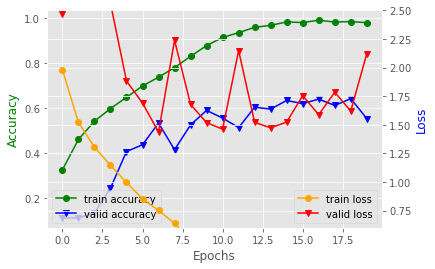

####################### da network #######################
8/8 [==============================] - 2s 277ms/step - loss: 1.3354 - accuracy: 0.6400


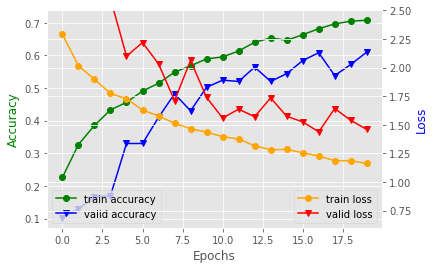

####################### ls network #######################
8/8 [==============================] - 2s 251ms/step - loss: 1.2479 - accuracy: 0.6960


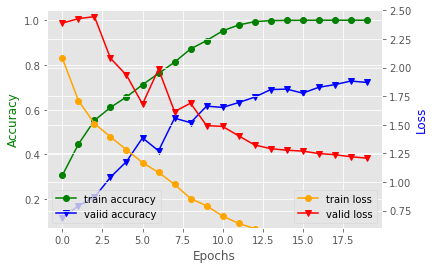

In [558]:
print("####################### BN network #######################")
batch_norm_network.compute_accuracy(data_manager.X_test, data_manager.y_test)
batch_norm_network.plot_progress()
print("####################### da network #######################")
data_augmentation_network.compute_accuracy(data_manager.X_test, data_manager.y_test)
data_augmentation_network.plot_progress()
print("####################### ls network #######################")
label_smoothing_network.compute_accuracy(data_manager.X_test, data_manager.y_test)
label_smoothing_network.plot_progress()

<span style="color:red">**Question 8**</span> **Exploring Data Mixup Technique for Improving Generalization Ability.**

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for label smoothing reference as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above with label smoothing technique, train a model with that code, and write your observations and comments about the result.

### Ans.
We based on the mathematic concept from the paper to develope `Mix_up` method. 

$$\bar{x} = \lambda x_i + (1 - \lambda) x_j, \text{where  } x_i, x_j\text{are raw input vectors}$$
$$\bar{y} = \lambda y_i + (1 - \lambda) y_j, \text{where  } y_i, y_j\text{are raw input vectors}$$

So at the end we will mix up the orginal dataset and get a new set of dataset from `X_train`. From the observation of the performance of the `mix up`. We may find the fluctuation between the loss is smaller than `batch normalizaiton` which provides an insight that `mix up` did a good job at regularizing ML model, and can gradually improve the model performance. 

But the model increase the noise within the training data and add up the noise between the network. Because the model complexitiy is higher, the first few epochs we may find the high `training_loss` and lesser `train_accuracy`. But after the tuning, its higher parameters we can observe the performance is better than `batch_normalization` model. 

In [225]:
# Insert your code here. You can add more cells if necessary
################ Data Preparation For Mix up ################
BATCH_SIZE = 64
train_ds_one = (
    tf.data.Dataset.from_tensor_slices((data_manager.X_train.copy().astype("float32"), 
                                        data_manager.y_train.copy().astype("float32")))
    .shuffle(BATCH_SIZE * 100)
    .batch(BATCH_SIZE)
)
train_ds_two = (
    tf.data.Dataset.from_tensor_slices((data_manager.X_train.copy().astype("float32"), 
                                        data_manager.y_train.copy().astype("float32")))
    .shuffle(BATCH_SIZE * 100)
    .batch(BATCH_SIZE)
)
train_ds = tf.data.Dataset.zip((train_ds_one, train_ds_two))
val_ds = tf.data.Dataset.from_tensor_slices((data_manager.X_valid.copy(), 
                                             data_manager.y_valid.copy())).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((data_manager.X_test.copy(), 
                                              data_manager.y_test.copy())).batch(64)

def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


def mix_up(ds_one, ds_two, alpha=0.2):
    # Unpack two datasets with the batch_size tensor
    images_one, labels_one = ds_one
    images_two, labels_two = ds_two
    batch_size = tf.shape(images_one)[0]

    # Sample lambda and reshape it to do the mixup
    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))
    y_l = tf.reshape(l, (batch_size, 1))

    # Perform mixup on both images and labels by combining a pair of images/labels
    # (one from each dataset) into one image/label
    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    return (images, labels)

train_ds_mu = train_ds.map(
    lambda ds_one, ds_two: mix_up(ds_one, ds_two, alpha=0.2), num_parallel_calls=tf.data.AUTOTUNE
)
########################################################################

Epoch 1/20
6/6 [==============================] - 8s 1s/step - loss: 3.5809 - accuracy: 0.0000e+00 - val_loss: 2.4014 - val_accuracy: 0.8860
Epoch 2/20
6/6 [==============================] - 5s 841ms/step - loss: 2.6590 - accuracy: 0.0000e+00 - val_loss: 2.9281 - val_accuracy: 0.1480
Epoch 3/20
6/6 [==============================] - 5s 888ms/step - loss: 2.5188 - accuracy: 0.0052 - val_loss: 3.9098 - val_accuracy: 0.0100
Epoch 4/20
6/6 [==============================] - 5s 972ms/step - loss: 2.4954 - accuracy: 0.0052 - val_loss: 4.6311 - val_accuracy: 0.0040
Epoch 1/20
400/400 [==============================] - 75s 180ms/step - loss: 2.3334 - accuracy: 0.1800 - val_loss: 2.4885 - val_accuracy: 0.1900
Epoch 2/20
400/400 [==============================] - 67s 168ms/step - loss: 2.0527 - accuracy: 0.2595 - val_loss: 1.9434 - val_accuracy: 0.3080
Epoch 3/20
400/400 [==============================] - 48s 121ms/step - loss: 1.9011 - accuracy: 0.3120 - val_loss: 1.9244 - val_accuracy: 0.3160


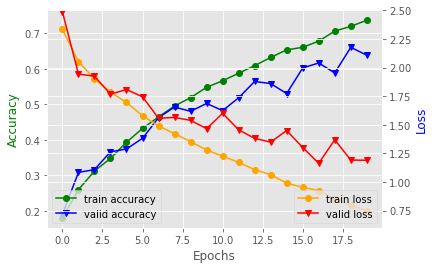

In [229]:
mix_up_network = YourModel(name='network8', feature_maps=32,
                           num_classes=len(data_manager.classes),
                           num_blocks=4,
                           drop_rate= 0.3,
                           batch_norm=True,
                           is_augmentation=True,
                           optimizer='adam',
                           learning_rate= 0.001)
mix_up_network.build_cnn()
# mix_up_network.summary()
mix_up_network.fit(data_manager,train_ds_mu, num_epochs = 20)
mix_up_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

========================== batch norm ================================


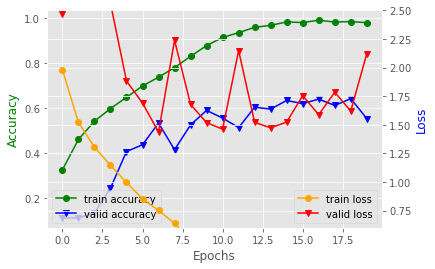

8/8 [==============================] - 1s 150ms/step - loss: 2.1857 - accuracy: 0.5600
========================== label smoothing =================================


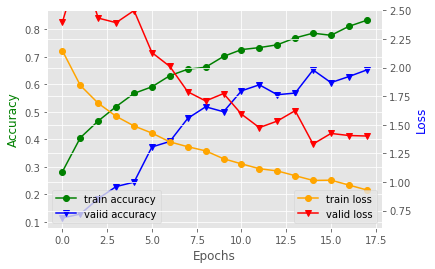

8/8 [==============================] - 1s 155ms/step - loss: 1.2831 - accuracy: 0.6840
========================== mix up =================================


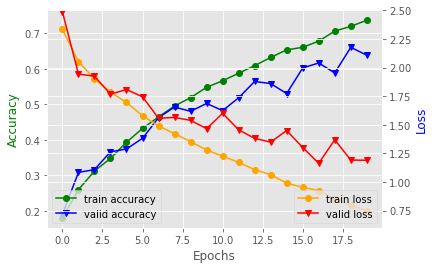

8/8 [==============================] - 2s 204ms/step - loss: 1.0767 - accuracy: 0.6560


0.656000018119812

In [479]:
print("========================== batch norm ================================")
batch_norm_network.plot_progress()
batch_norm_network.compute_accuracy(data_manager.X_test, data_manager.y_test)
print("========================== label smoothing =================================")
label_smoothing_network.plot_progress()
label_smoothing_network.compute_accuracy(data_manager.X_test, data_manager.y_test)
print("========================== mix up =================================")
mix_up_network.plot_progress()
mix_up_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

<span style="color:red">**Question 9**</span> **Attack your best obtained model with PGD and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.005$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.**

### Ans
Due to some errors and formating question, I tried to alter the model to `from_logit = True`.
By transforming input format we are able to find the adversial attack in the `pgd` and `fgsm` attacks.
#### Observate
* Test orginal accuracy: 0.704
* Test pgd_adv accuracy: 0.394
* Test fgsm_adv accuracy: 0.298

In [78]:
# Insert your code here. You can add more cells if necessary
##########################  label smoothing  ##################################
from tensorflow.keras.losses import categorical_crossentropy
class smoothing(tf.keras.losses.Loss):
    def __init__(self, label_smoothing=0.1, num_classes= len(data_manager.classes)):
        super(smoothing, self).__init__()
        self.label_smoothing = label_smoothing
        self.num_classes = num_classes
        
    def call(self, y_true, y_pred):
        y_true_1_hot = tf.one_hot(tf.transpose(tf.cast(y_true, tf.int32), perm= [1,0])[0], 
                                  depth= self.num_classes, axis=-1)
        loss = categorical_crossentropy(y_true_1_hot, y_pred, label_smoothing = self.label_smoothing,
                                       from_logits = True)
        # tf.print(loss)
        return loss
##############################################################################
class YourModel(DefaultModel):
    def __init__(self,
                 name='network7',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = None,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, 
                                        num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, 
                                        learning_rate)
    
    def build_cnn(self):
        #reuse code of previous section here
        self.model = models.Sequential()
        for i in range(self.num_blocks):
            # Conv Layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding = 'same', 
                                         input_shape=(32,32,3)))
            # Batch Norm
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            # Activation Function
            self.model.add(layers.Activation(self.activation_func))
            # Conv Layer
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding = 'same'))
            # Batch Norm
            if self.batch_norm is not None:
                self.model.add(layers.BatchNormalization())
            # Activation Function
            self.model.add(layers.Activation(self.activation_func))
            # Mean Pool
            self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding='same'))
    
        # Flattening
        self.model.add(layers.Flatten())
        
        # Output
        self.model.add(layers.Dense(self.num_classes, activation= None))
        
    
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        earlyStopping = EarlyStopping(monitor='val_accuracy', patience=3, mode = 'max')
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        ############################################################################
        self.model.compile(optimizer=self.optimizer, 
                           loss=smoothing(), 
                           metrics=['accuracy'])
        ############################################################################
        self.history = self.model.fit(x = data_manager.X_train, 
                                      y = data_manager.y_train, 
                                      validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = num_epochs, 
                                      batch_size = batch_size, 
                                      callbacks=[earlyStopping],
                                      verbose= self.verbose)

Epoch 1/20
63/63 [==============================] - 25s 391ms/step - loss: 2.0600 - accuracy: 0.3187 - val_loss: 2.3190 - val_accuracy: 0.1480
Epoch 2/20
63/63 [==============================] - 26s 414ms/step - loss: 1.6899 - accuracy: 0.4647 - val_loss: 2.5038 - val_accuracy: 0.1420
Epoch 3/20
63/63 [==============================] - 26s 416ms/step - loss: 1.5396 - accuracy: 0.5393 - val_loss: 2.5208 - val_accuracy: 0.1660
Epoch 4/20
63/63 [==============================] - 29s 455ms/step - loss: 1.4174 - accuracy: 0.5910 - val_loss: 2.3330 - val_accuracy: 0.2700
Epoch 5/20
63/63 [==============================] - 29s 466ms/step - loss: 1.3001 - accuracy: 0.6560 - val_loss: 2.2252 - val_accuracy: 0.3040
Epoch 6/20
63/63 [==============================] - 29s 454ms/step - loss: 1.1831 - accuracy: 0.7067 - val_loss: 2.0070 - val_accuracy: 0.3920
Epoch 7/20
63/63 [==============================] - 29s 467ms/step - loss: 1.0973 - accuracy: 0.7517 - val_loss: 1.5864 - val_accuracy: 0.5160

Using the robusting model(`label_smoothing`) as the pretrain model to obtain the attack.

In [106]:
attack_network = YourModel(name='network11',
                           feature_maps=32,
                           num_classes=len(data_manager.classes),
                           num_blocks=4,
                           drop_rate= 0.3,
                           batch_norm=True,
                           optimizer='adam',
                           learning_rate= 0.001)
attack_network.build_cnn()
attack_network.fit(data_manager, batch_size = 64, num_epochs = 20)
acc = attack_network.compute_accuracy(data_manager.X_test, data_manager.y_test, batch_size = 64)

Epoch 1/20
63/63 [==============================] - 25s 390ms/step - loss: 2.0789 - accuracy: 0.3210 - val_loss: 2.3343 - val_accuracy: 0.1500
Epoch 2/20
63/63 [==============================] - 24s 383ms/step - loss: 1.7253 - accuracy: 0.4475 - val_loss: 2.4795 - val_accuracy: 0.1580
Epoch 3/20
63/63 [==============================] - 24s 375ms/step - loss: 1.5539 - accuracy: 0.5337 - val_loss: 2.3283 - val_accuracy: 0.2000
Epoch 4/20
63/63 [==============================] - 24s 374ms/step - loss: 1.4306 - accuracy: 0.5875 - val_loss: 2.4189 - val_accuracy: 0.2280
Epoch 5/20
63/63 [==============================] - 24s 382ms/step - loss: 1.3226 - accuracy: 0.6420 - val_loss: 2.6011 - val_accuracy: 0.2600
Epoch 6/20
63/63 [==============================] - 24s 380ms/step - loss: 1.1960 - accuracy: 0.6973 - val_loss: 1.9116 - val_accuracy: 0.4180
Epoch 7/20
63/63 [==============================] - 24s 379ms/step - loss: 1.0989 - accuracy: 0.7393 - val_loss: 1.6587 - val_accuracy: 0.5020

In [80]:
def pgd_attack(model, input_image, input_label= None, 
              epsilon=0.3, 
              num_steps=20, 
              step_size=0.01, 
              clip_value_min=0., 
              clip_value_max=1.0, 
              soft_label=False,
              from_logits= True): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        num_steps: number of attack steps 
        step_size: size of each move in each attack step 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector  
    """       
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy  #compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    # random initialization around input_image 
    random_noise = tf.random.uniform(shape=input_image.shape, minval=-epsilon, maxval=epsilon)
    adv_image = input_image + random_noise
    
    for _ in range(num_steps): 
        with tf.GradientTape(watch_accessed_variables=False) as tape: 
            tape.watch(adv_image)
            adv_output = model(adv_image)
            if not soft_label:
                loss = loss_fn(input_label, adv_output, from_logits= from_logits) # use ground-truth label to attack
            else: 
                pred_label = tf.math.argmax(adv_output, axis=1)
                loss = loss_fn(pred_label, adv_output, from_logits= from_logits) # use predicted label to attack

        gradient = tape.gradient(loss, adv_image) # get the gradient of the loss w.r.t. the current point 
        adv_image = adv_image + step_size * tf.sign(gradient) # move current adverarial example along the gradient direction with step size is eta 
        adv_image = tf.clip_by_value(adv_image, input_image-epsilon, input_image+epsilon) # clip to a valid boundary  
        adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max)  # clip to a valid range
        adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input 
    return adv_image

In [81]:
def fgsm_attack(model, input_image, 
                input_label=None, 
                epsilon=0.3, 
                clip_value_min= -1.0, 
                clip_value_max=1.0, 
                soft_label=False,
                from_logits=True): 
    """
    Args: 
        model: pretrained model 
        input_image: original (clean) input image (tensor)
        input_label: original label (tensor, categorical representation)
        epsilon: perturbation boundary 
        clip_value_min, clip_value_max: range of valid input 
        from_logits = True: attack from logits otherwise attack from prediction probabilites
    Note: 
        we expect the output of model should be logits vector 
    """
    
    loss_fn = tf.keras.losses.sparse_categorical_crossentropy 
    # compute CE loss from logits or prediction probabilities
    
    if type(input_image) is np.ndarray: 
        input_image = tf.convert_to_tensor(input_image)
    
    if type(input_label) is np.ndarray: 
        input_label = tf.convert_to_tensor(input_label)
        
    with tf.GradientTape() as tape: 
        tape.watch(input_image)
        output = model(input_image)
        if not soft_label:
            loss = loss_fn(input_label, output, from_logits=from_logits) # use ground-truth label to attack
        else: 
            pred_label = tf.math.argmax(output, axis=1) # use predicted label to attack
            loss = loss_fn(pred_label, output, from_logits=from_logits)

    gradient = tape.gradient(loss, input_image) # get the gradients of the loss w.r.t. the input image 
    adv_image = input_image + epsilon * tf.sign(gradient) # get the final adversarial examples 
    adv_image = tf.clip_by_value(adv_image, clip_value_min, clip_value_max) # clip to a valid range  
    adv_image = tf.stop_gradient(adv_image) # stop the gradient to make the adversarial image as a constant input
    return adv_image

In [97]:
import tensorflow_datasets as tfds
# !pip install tensorflow_datasets
X_train = data_manager.X_train.copy().astype("float32")
y_train = data_manager.y_train.copy().astype("int32")
X_test = data_manager.X_test.copy().astype("float32")
y_test = data_manager.y_test.copy().astype("int32")

In [110]:
from sklearn.metrics import accuracy_score
##################### PGD Attack #####################
x_pgd_adv = pgd_attack(attack_network.model,
                       X_test, 
                       input_label = y_test,
                       epsilon=0.0313, 
                       num_steps=20, 
                       step_size= 0.005, 
                       soft_label=True, 
                       clip_value_min= -1.0, 
                       clip_value_max = 1.0, 
                       from_logits=True)
y_pgd_adv = np.argmax(attack_network.model(x_pgd_adv).numpy(), 1)

#################### FGSM Attack #####################
x_fgsm_adv = fgsm_attack(attack_network.model, 
                         X_test, 
                         input_label = y_test, 
                         epsilon=0.0313, 
                         soft_label=True, 
                         clip_value_min= -1.0, 
                         clip_value_max = 1.0, 
                         from_logits = True)
y_fgsm_adv = np.argmax(attack_network.model(x_fgsm_adv).numpy(), 1)

print("############################ Test accuracy #################################")
print("Test orginal accuracy: {}".format(acc))
test_pgd_adv_acc = accuracy_score(y_test, y_pgd_adv)
print("Test pgd_adv accuracy: {}".format(test_pgd_adv_acc))
test_fgsm_adv_acc = accuracy_score(y_test, y_fgsm_adv)
print("Test fgsm_adv accuracy: {}".format(test_fgsm_adv_acc))

############################ Test accuracy #################################
Test orginal accuracy: 0.7039999961853027
Test pgd_adv accuracy: 0.394
Test fgsm_adv accuracy: 0.298


In [146]:
def plot_diagrame(X, y, idx, classes, tile_shape=(5, 4)):
    plt.clf()
    fig, ax = plt.subplots(tile_shape[0], tile_shape[1], figsize=(2.5 * tile_shape[1], 2.5 * tile_shape[0]))
    for i in range(tile_shape[0]):
        for j in range(tile_shape[1]):
            ax[i, j].imshow((X[idx[i * tile_shape[1] + j]] + 1.0)/2)
            ax[i, j].set_title('p: {}'.format(classes[y[idx[i * tile_shape[1] + j]]]))
            ax[i, j].grid(False)
            ax[i, j].axis('off')
    plt.show()

### Image Output

############################ Original Image ############################


<Figure size 432x288 with 0 Axes>

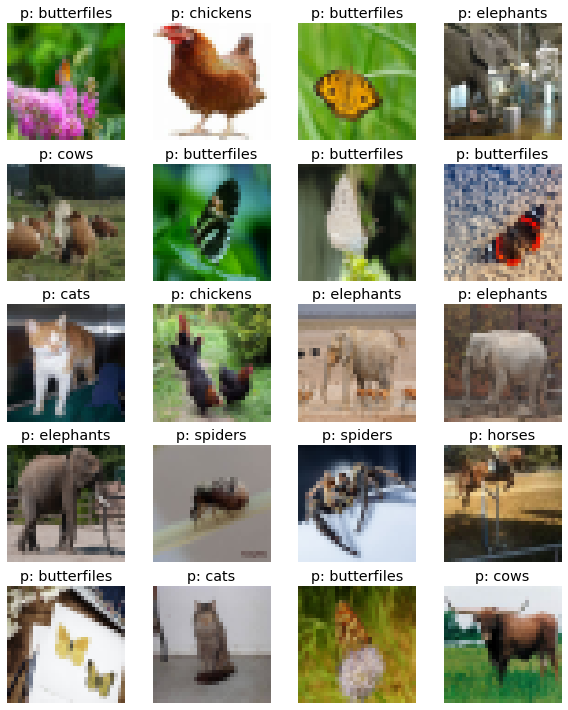

############################ PGD ############################


<Figure size 432x288 with 0 Axes>

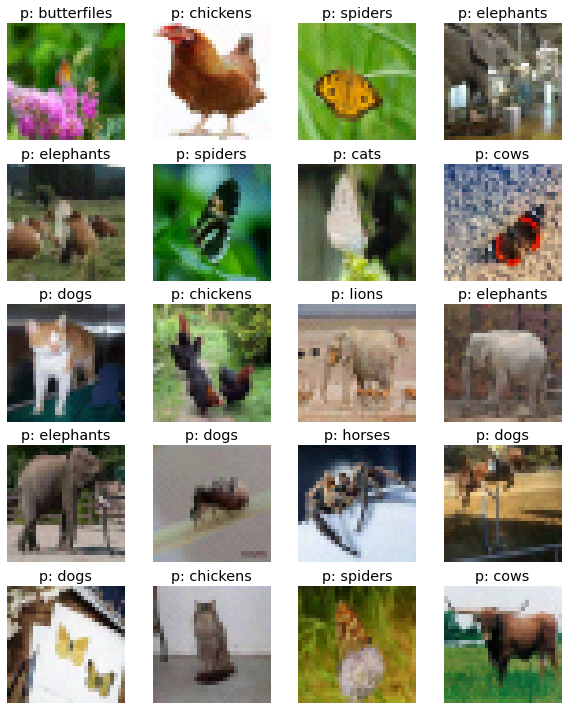

############################ FGSM ############################


<Figure size 432x288 with 0 Axes>

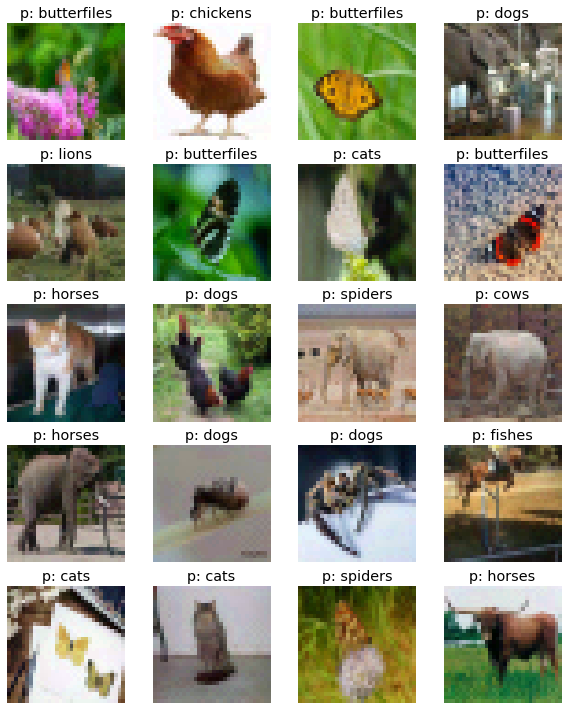

In [149]:
idx = np.random.choice(len(y_test), 20)
print("############################ Original Image ############################")
plot_diagrame(X_test, y_test, idx, data_manager.classes, tile_shape = (5, 4))
print("############################ PGD ############################")
plot_diagrame(x_pgd_adv, y_pgd_adv, idx, data_manager.classes, tile_shape = (5, 4))
print("############################ FGSM ############################")
plot_diagrame(x_fgsm_adv, y_fgsm_adv,idx, data_manager.classes, tile_shape = (5, 4))

<span style="color:red">**Question 10**</span> **Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.005}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.005$ on the testing set.**

After the training we can find the model did provide a more obvious improvement. 

Though the parameter didn't inheriate the weight to the saved model, but with the altered tensor we can optimize the result of the model as below:
* Test orginal accuracy: 0.74
* Test pgd_adv accuracy: 0.394 -> 0.5
* Test fgsm_adv accuracy: 0.298 -> 0.484

In [114]:
optimizer = tf.optimizers.Adam(learning_rate=0.001)
loss_obj = tf.nn.sparse_softmax_cross_entropy_with_logits

# metrics to track the different accuracies.
train_loss = tf.metrics.Mean(name='train_loss')
test_acc_clean = tf.metrics.SparseCategoricalAccuracy()
test_acc_pgd = tf.metrics.SparseCategoricalAccuracy()

# Defence model by the robust 
robust_defence = attack_network.model
def train_step_adv(x, x_adv, y):
    with tf.GradientTape() as tape:
        logits = robust_defence(x)
        logits_adv = robust_defence(x_adv)
        loss = (loss_obj(y, logits) + loss_obj(y, logits_adv))/2
        gradients = tape.gradient(loss, robust_defence.trainable_variables)
        optimizer.apply_gradients(zip(gradients, robust_defence.trainable_variables))
    return loss

In [118]:
epochs = 5 # number of epochs
for epoch in range(epochs):
    # keras like display of progress
    progress_bar_train = tf.keras.utils.Progbar(60000, verbose=2)
    # replace clean example with adversarial example by 10-steps projected_gradient_descent for adversarial training
    x_adv = pgd_attack(robust_defence, X_test, y_test, 0.0313, 20, 0.005, -1.0, 1.0)
    loss = train_step_adv(X_test, x_adv, y_test)
    y_pred = robust_defence(X_test)
    test_acc_clean(y_test, y_pred)
    train_loss(loss)
    progress_bar_train.add(X_test.shape[0], 
                           values=[('loss', train_loss.result()), ("acc (%)", test_acc_clean.result() * 100)])

Save the model to the hardware.

In [120]:
robust_defence.save(".\models\Defence_Model.h5")

Restore the model from the pre-saved model.
Cause we are not looking for the self-customized lost function so we turn the compile to `False`

In [126]:
robust_defence = keras.models.load_model(".\models\Defence_Model.h5", compile=False)

Testing the result with the trained model.

In [152]:
##################### PGD Attack #####################
x_pgd_adv = pgd_attack(robust_defence,
                       X_test, 
                       input_label = y_test,
                       epsilon=0.0313, 
                       num_steps=20, 
                       step_size= 0.005, 
                       soft_label=True, 
                       clip_value_min= -1.0, 
                       clip_value_max = 1.0, 
                       from_logits=True)
y_pgd_adv = np.argmax(robust_defence(x_pgd_adv).numpy(), 1)

#################### FGSM Attack #####################
x_fgsm_adv = fgsm_attack(robust_defence, 
                         X_test, 
                         input_label = y_test, 
                         epsilon=0.0313, 
                         soft_label=True, 
                         clip_value_min= -1.0, 
                         clip_value_max = 1.0, 
                         from_logits = True)
y_fgsm_adv = np.argmax(robust_defence(x_fgsm_adv).numpy(), 1)

print("############################ Test accuracy #################################")
print("Test orginal accuracy: {}".format(acc))
test_pgd_adv_acc = accuracy_score(y_test, y_pgd_adv)
print("Test pgd_adv accuracy: {}".format(test_pgd_adv_acc))
test_fgsm_adv_acc = accuracy_score(y_test, y_fgsm_adv)
print("Test fgsm_adv accuracy: {}".format(test_fgsm_adv_acc))

############################ Test accuracy #################################
Test orginal accuracy: 0.7039999961853027
Test pgd_adv accuracy: 0.5
Test fgsm_adv accuracy: 0.484
